### Importing Libraries

In [56]:
import pandas as pd
# libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

### Loading the dataset

In [34]:
df = pd.read_csv('train_set.csv')

In [3]:
df.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [7]:
df.shape

(33000, 2)

In [10]:
print('The number of columns in the data is:  ', len(df.columns))
print('The number of rows in the data is:  ', len(df))

The number of columns in the data is:   2
The number of rows in the data is:   33000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


* There are no missing values
* The two columns have object type data, which is not suitable for machine learning

In [12]:
#Checking for the number of unique Languages in the dataset
df['lang_id'].nunique()

11

In [11]:
#Checking for unique languages
df['lang_id'].unique()

array(['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso',
       'sot', 'afr'], dtype=object)

In [15]:
#Calculating the count for each response value
df['lang_id'].value_counts()

afr    3000
ven    3000
nbl    3000
tsn    3000
sot    3000
xho    3000
ssw    3000
eng    3000
tso    3000
zul    3000
nso    3000
Name: lang_id, dtype: int64

In [7]:
def perc_on_bar(lang_id):
    '''
    plot
    feature: lang_id
    '''
    #Creating a countplot for the response values
    sns.set(rc={'figure.figsize':(15,7)})
    ax=sns.countplot(x=lang_id, data=df)
    
    total = len(lang_id) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the languages
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # heightt of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
        
    plt.show() # show the plot

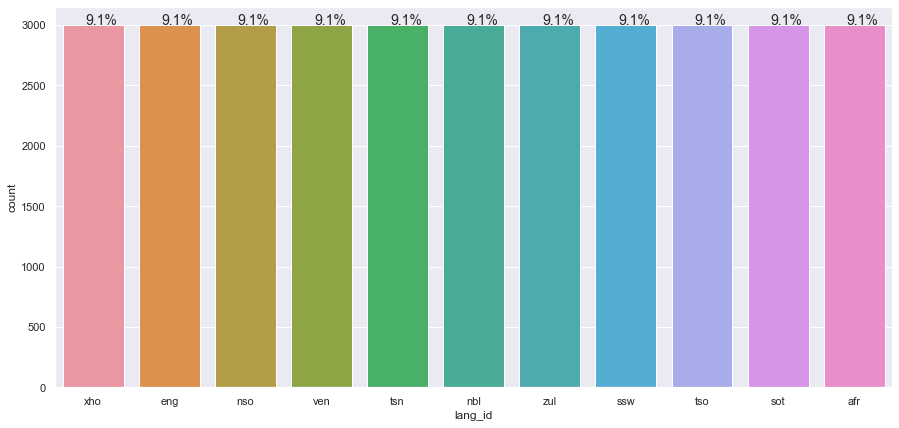

In [8]:
perc_on_bar(df['lang_id'])

* It looks like the data is well distributed, there will be no need for resampling the data.

array([[<AxesSubplot:title={'center':'afr'}>,
        <AxesSubplot:title={'center':'eng'}>,
        <AxesSubplot:title={'center':'nbl'}>],
       [<AxesSubplot:title={'center':'nso'}>,
        <AxesSubplot:title={'center':'sot'}>,
        <AxesSubplot:title={'center':'ssw'}>],
       [<AxesSubplot:title={'center':'tsn'}>,
        <AxesSubplot:title={'center':'tso'}>,
        <AxesSubplot:title={'center':'ven'}>],
       [<AxesSubplot:title={'center':'xho'}>,
        <AxesSubplot:title={'center':'zul'}>, <AxesSubplot:>]],
      dtype=object)

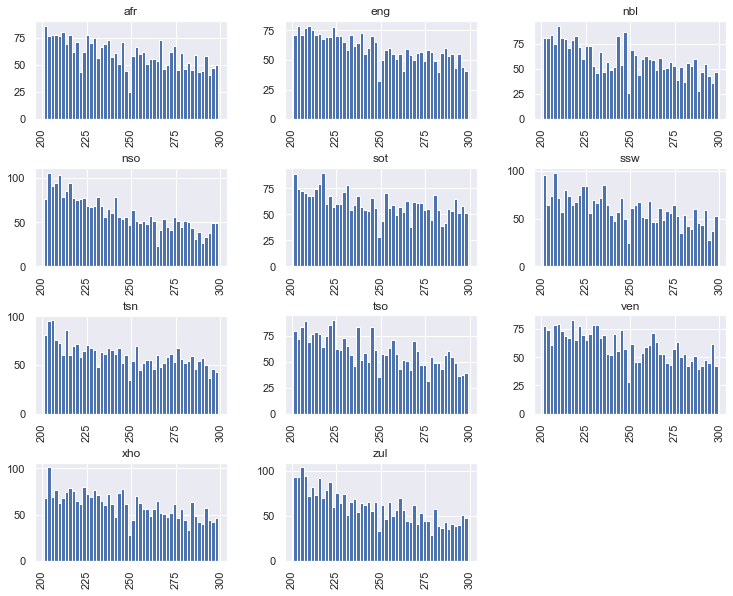

In [11]:
df_copy = df
df_copy['len_df'] = df_copy['text'].apply(len)
df_copy.hist(column='len_df', by = 'lang_id', bins = 50, figsize = (12,10))

In [30]:
df = df[['lang_id', 'text']].groupby('lang_id').count()

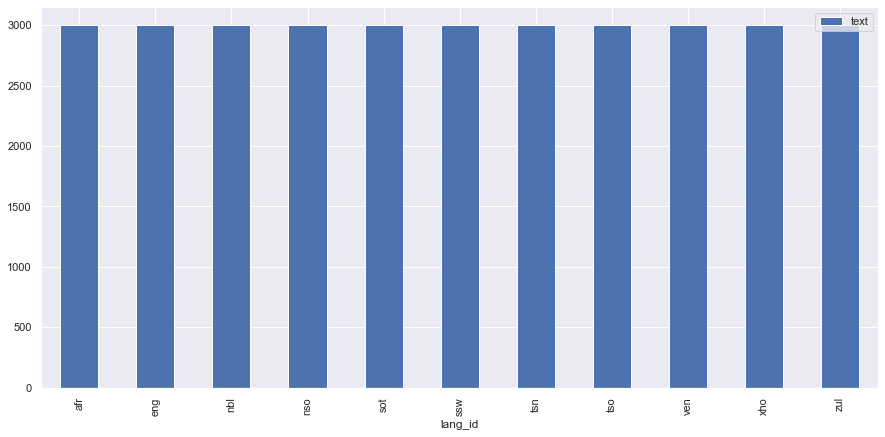

In [31]:
# Plot posts by personality types
df.sort_values('text', ascending=False).plot(kind='bar')
plt.show()

In [23]:
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords# Import the stop word list
from wordcloud import WordCloud
from nltk.stem import SnowballStemmer, PorterStemmer,WordNetLemmatizer

In [35]:
def msg_words(text):
    # Function to convert a raw review to a string of words
    # The input is a single string (a message), and 
    # the output is a single string (a preprocessed message)
    #
    # 1. Remove HTML
    msg_text = BeautifulSoup(text).get_text() 
    #msg_text = re.sub( r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+','',message)
    # 2. Remove non-letters        
    msg1 = re.sub("[^a-zA-Z]", " ", msg_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = msg1.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stop_words = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    clean_words = [w for w in words if not w in stop_words] 
    #
   
    #st = SnowballStemmer('english')
    #clean_msgs1=[st.stem(word) for word in r]
    #lem = WordNetLemmatizer()
    #clean_msgs2 = [lem.lemmatize(word) for word in clean_words]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join(clean_words))   


In [36]:
# Get the number of messages based on the dataframe column size
num_msgs = df["text"].size

# Initialize an empty list to hold the clean messagess
clean_msgs = []

# Loop over each message; create an index i that goes from 0 to the length
# of the message list 
for i in range( 0, num_msgs ):
    # Call our function for each one, and add the result to the list of
    # clean messages
    clean_msgs.append( msg_words( df["text"][i] ) )

In [39]:
clean_msgs[:5]

['umgaqo siseko wenza amalungiselelo kumaziko axhasa ulawulo lwesininzi kunye nokuthath inxaxheba kwabafazi ezi ziquka phakathi kwezinye zazo ikomishoni yokulingana ngokwesini ikomishoni yamalungelo oluntu lomzantsi afrika',
 'dha iya kuba nobulumko bokubeka umsebenzi naphi na kwisebe ngokusekwe kwiimfuno zokusebenza zalo emva kokubonana nomsebenzi kunye okanye imanyano yakhe ukuba ulandulo lomntu onjalo alufanelekanga dha mayibize uncedo olufanelekileyo elungelweni layo',
 'province kwazulu natal department transport invites tenders established contractors experienced bridge construction construction kwajolwayo tugela river pedestrian bridge near tugela ferry duration project months',
 'netefat gore ba file dilo ka moka e le dumelelanego ka ona mohlala maleri magolo omi wago go fihlelela meagong e metelele scaffolds bolokegilego lefelo la maleba la go omela go phela gabotse bjbj',
 'khomishini ya ndinganyiso ya mbeu yo ewa maana u ya nga mulayo wa khomishini ya ndinganyiso ya mbeu u t

In [37]:
# Let's use the count vectorizer with its default hyperparameters
vect = CountVectorizer()
X_count = vect.fit_transform(df['text'].values.astype(str))

In [38]:
X_count.shape

(33000, 141958)

In [40]:
vect_5000 = CountVectorizer(lowercase=True, max_features=5000,analyzer='word')
X_count = vect_5000.fit_transform(df['text'].values.astype(str))

In [41]:
X = X_count.toarray()

In [43]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# Fit label encoder and return encoded labels
y = le.fit_transform(df['lang_id'])

In [44]:
y

array([9, 9, 1, ..., 1, 9, 4])

In [45]:
# List of label encoder types to use for lookup 
type_labels = list(le.classes_)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Here 'ovr' indicates that we have selected our One-vs-Rest strategy. 
logreg = LogisticRegression(multi_class='ovr')

In [49]:
logreg.fit(X_train, y_train)

LogisticRegression(multi_class='ovr')

In [50]:
# Generate predictions
y_pred_test = logreg.predict(X_test)

In [64]:
?f1_score

In [66]:
f1score = f1_score(y_test, y_pred_test, average= 'macro')
print('f1 score:', f1score)

f1 score: 0.9879149457660891


In [69]:
# Read the test data
test = pd.read_csv("test_set.csv")

# Verify that there are rows and 2 columns
print (test.shape)

# Create an empty list and append the text one by one
num_msgs = len(test["text"])
clean_test_msgs = [] 

print ("Cleaning and parsing the test set text...\n")
for i in range(0,num_msgs):
    if( (i+1) % 1000 == 0 ):
        print ("Review %d of %d\n" % (i+1, num_msgs))
    clean_msg = msg_words( test["text"][i] )
    clean_test_msgs.append( clean_msg )

# Get a bag of words for the test set, and convert to a numpy array
test_data_features = vect_5000.transform(clean_test_msgs)
test_data_features = test_data_features.toarray()

# Use the random forest to make sentiment label predictions
result = logreg.predict(test_data_features)

# Copy the results to a pandas dataframe with an "id" column and
# a "sentiment" column
output = pd.DataFrame( data={"index":test["index"], "lang_id":result} )

# Use pandas to write the comma-separated output file
output.to_csv( "Hackathon1_logres.csv", index=False, quoting=3 )

(5682, 2)
Cleaning and parsing the test set text...

Review 1000 of 5682

Review 2000 of 5682

Review 3000 of 5682

Review 4000 of 5682

Review 5000 of 5682

